In [3]:
import numpy as np
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from gensim.models.keyedvectors import KeyedVectors
import re

In [31]:
vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()
svd = TruncatedSVD(n_components=400)
embeddings = KeyedVectors.load_word2vec_format('../model_swm_300-6-10-low.w2v', binary=False)
regex = "([@][A-Za-z0-9]+)|([^0-9A-Za-z# \t])|(\w+:\/\/\S+)|(#[^A-Za-z0-9]+)"
tweets = []
labels = []

In [34]:
with open('../../../data/train_semeval2018task2/tweets_us.text', 'r') as file:
    for tweet in file:
        reg_tweet = ' '.join(re.sub(regex, " ", tweet).split())
        low_tweet = reg_tweet.lower()
        tweets.append(low_tweet)
with open('../../../data/train_semeval2018task2/tweets_us.labels', 'r') as file:
    for label in file:
        tweet_label = int(label)
        labels.append(tweet_label)

In [39]:
tweets_total = []

word_vectors = embeddings.wv
# del embeddings
for tweet in tweets:
    total = np.zeros(300)
    for word in tweet:
        if word == ' ':
            continue
        total += word_vectors[word]
    total /= float(len(tweet))
    tweets_total.append(total)
X = np.asarray(tweets_total)

/Users/DeltaBourne/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in divide
  # This is added back by InteractiveShellApp.init_path()


In [40]:
print X.shape

(488553, 300)


In [6]:
# X = vectorizer.fit_transform(tweets)
y = np.asarray(labels)

In [7]:
X_tfidf = tfidf_vectorizer.fit_transform(tweets)

In [8]:
X_lsa = svd.fit_transform(X_tfidf)

(488553, 286990)
(488553, 400)


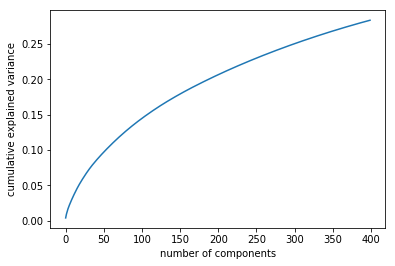

In [9]:
print X_tfidf.shape
print X_lsa.shape
# print svd.explained_variance_ratio_
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_lsa, y, test_size=.20)

In [11]:
model = LogisticRegression() # use default parameters
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
model.score(X_test, y_test)

0.29785796890831123

In [13]:
def F_1(P, R):
    return (2*P*R/(P+R))

In [16]:
val_1 = 50
val_2 = 100
val_3 = 150
val_4 = 20000

sample_1 = X_test[:val_1]
sample_2 = X_test[:val_2]
sample_3 = X_test[:val_3]
sample_4 = X_test[:val_4]

y_1 = y_test[:val_1]
y_2 = y_test[:val_2]
y_3 = y_test[:val_3]
y_4 = y_test[:val_4]

C1 = model.predict(sample_1)
C2 = model.predict(sample_2)
C3 = model.predict(sample_3)
C4 = model.predict(sample_4)

P1 = precision_score(y_1, C1, average='macro')
P2 = precision_score(y_2, C2, average='macro')
P3 = precision_score(y_3, C3, average='macro')
P4 = precision_score(y_4, C4, average='macro')

R1 = recall_score(y_1, C1, average='macro')
R2 = recall_score(y_2, C2, average='macro')
R3 = recall_score(y_3, C3, average='macro')
R4 = recall_score(y_4, C4, average='macro')

print 'Precision'
print P1
print P2
print P3
print P4
print 
print 'Recall'
print R1
print R2
print R3
print R4
print
print 'F1'
print F_1(P1,R1)
print F_1(P2,R2)
print F_1(P3,R3)
print F_1(P4,R4)

Precision
0.205208333333
0.165991902834
0.174043062201
0.255617846945

Recall
0.280729166667
0.18478597426
0.170048785064
0.153881299371

F1
0.23710030368
0.17488546164
0.172022740506
0.192111787213
